<a href="https://colab.research.google.com/github/Abhishekk62/Insurance-Claim-Fraud-Detection-ML-project/blob/main/Insurance_fraud_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('insurance_dataset.csv')
X = data.drop(columns=['fraud_reported'])
y = data['fraud_reported']

In [ ]:
data.replace('?',np.nan, inplace=True)

In [ ]:
data.isna().sum()

,0
months_as_customer,0
age,0
policy_annual_premium,0
Gender,0
insured_education_level,0
incident_type,0
collision_type,178
incident_severity,0
authorities_contacted,91
incident_hour_of_the_day,0


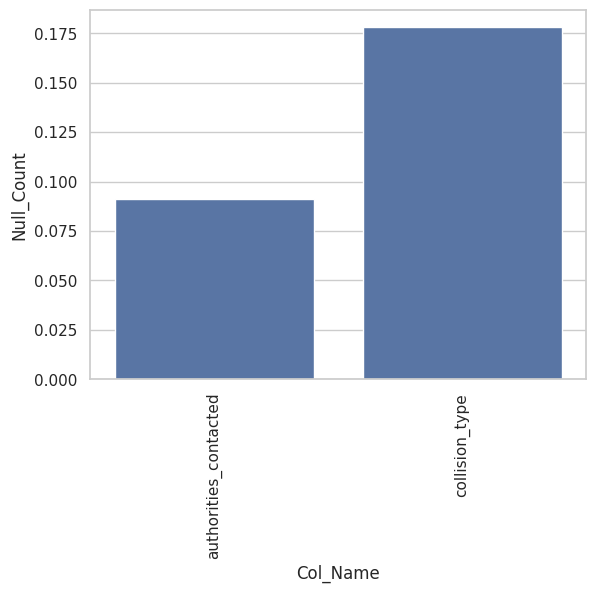

In [ ]:
missing = data.isnull().sum() / len(data) # perncentage
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt. show()

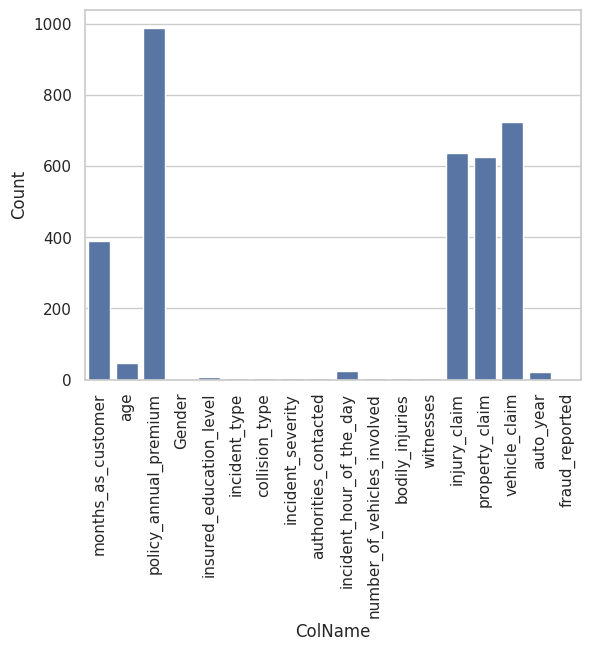

In [ ]:
unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot (x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(X)

     months_as_customer  age  policy_annual_premium  Gender  \
0                   328   48                1406.91    MALE   
1                   228   42                1197.22    MALE   
2                   134   29                1413.14  FEMALE   
3                   256   41                1415.74  FEMALE   
4                   228   44                1583.91    MALE   
..                  ...  ...                    ...     ...   
995                   3   38                1310.80  FEMALE   
996                 285   41                1436.79  FEMALE   
997                 130   34                1383.49  FEMALE   
998                 458   62                1356.92    MALE   
999                 456   60                 766.19  FEMALE   

    insured_education_level             incident_type   collision_type  \
0                        MD  Single Vehicle Collision   Side Collision   
1                        MD             Vehicle Theft                ?   
2                    

In [ ]:
print(y)

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object


In [ ]:
categorical_features = [3,4,5,6,7,8]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_features)],remainder='passthrough')
X_transformed = ct.fit_transform(X)

In [ ]:
print(X_transformed)

[[0.000e+00 1.000e+00 0.000e+00 ... 1.302e+04 5.208e+04 2.004e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 7.800e+02 3.510e+03 2.007e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 3.850e+03 2.310e+04 2.007e+03]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 7.500e+03 5.250e+04 1.996e+03]
 [0.000e+00 1.000e+00 1.000e+00 ... 5.220e+03 3.654e+04 1.998e+03]
 [1.000e+00 0.000e+00 1.000e+00 ... 9.200e+02 3.680e+03 2.007e+03]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3)

In [ ]:
print(X_train)

[[0.000e+00 1.000e+00 0.000e+00 ... 8.680e+03 5.208e+04 2.006e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.240e+03 4.960e+03 2.005e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 4.446e+04 2.005e+03]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 1.920e+04 4.480e+04 2.001e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 1.410e+04 6.345e+04 2.011e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 1.440e+03 5.040e+03 1.999e+03]]


In [ ]:
print(X_test)

[[1.000e+00 0.000e+00 1.000e+00 ... 3.300e+02 2.310e+03 2.008e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 1.052e+04 4.734e+04 2.008e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 1.320e+04 3.960e+04 1.995e+03]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 1.618e+04 6.472e+04 2.005e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 7.000e+02 4.200e+03 2.007e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 5.040e+03 3.528e+04 2.000e+03]]


In [ ]:
y_train = [0 if label == 'N' else 1 for label in y_train]
y_test = [0 if label == 'N' else 1 for label in y_test]

In [ ]:
print(y_train)

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(y_test)

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
fraud_probs = log_model.predict_proba(X_test)[:, 1]
fraud_percentages = fraud_probs * 100 + 10
print(fraud_percentages)

[27.6412147  86.44518368 18.7155583  89.87168569 24.38084709 23.89286842
 19.9045049  81.26357367 73.07304145 18.40020514 15.20853047 24.77880313
 82.02219652 28.37244204 49.78361959 23.57752957 18.02121451 16.38914376
 27.57614252 35.71507655 15.00060896 18.48867949 21.43837634 73.35074133
 14.81362922 15.37687366 22.76428127 87.48290882 16.83789171 23.35728889
 19.72516417 19.24850123 18.87792343 18.36262706 81.78456352 83.5158875
 21.2260052  21.61008253 39.55883771 69.46589867 66.72491049 26.74918908
 17.62573538 21.84854813 15.3473001  20.94246393 30.14473463 85.87409351
 17.93746892 32.69638931 17.57184577 22.39659252 21.29506928 18.31111682
 22.29476753 88.09732093 22.68988581 15.40923291 29.32966188 26.47925262
 27.62213972 52.2249948  22.58992404 20.7991116  19.08232955 22.67476159
 15.4208825  28.14758335 20.83635505 15.87487398 25.87519637 11.67392646
 45.45069551 62.85665613 20.19386534 19.55847354 15.86982711 69.35845556
 19.59020091 24.7627256  16.90048868 67.59117528 71.

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
print(y_pred)

[0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1]


In [ ]:
log_accuracy = accuracy_score(y_test, y_pred)
log_conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(log_accuracy)
print(log_conf_matrix)

0.7933333333333333
[[204  30]
 [ 32  34]]


In [ ]:
custom_input = pd.DataFrame([{
    'months_as_customer': 328,
    'age': 48,
    'policy_annual_premium': 14060.91,
    'Gender': 'MALE',
    'insured_education_level': 'MD',
    'incident_type': 'Single Vehicle Collision',
    'collision_type': 'Side Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_hour_of_the_day': 5,
    'number_of_vehicles_involved': 1,
    'bodily_injuries': 1,
    'witnesses': 2,
    'injury_claim': 6510,
    'property_claim': 13020,
    'vehicle_claim': 52080,
    'auto_year': 2004
}])

custom_input_transformed = ct.transform(custom_input)
prediction = log_model.predict(custom_input_transformed)
print(prediction)

[1]


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                                  min_samples_leaf=1, min_samples_split=3, n_estimators=100)

rf_model.fit(X_train, y_train)
probabilities = rf_model.predict_proba(X_test)

fraud_probabilities = probabilities[:, 1]
fraud_percentages = fraud_probabilities * 100 + 20
print(fraud_percentages)

y_pred = rf_model.predict(X_test)



[35.66666667 76.16136364 42.33333333 86.38636364 34.97058824 38.05555556
 42.6875     78.60634921 58.46105649 31.25       27.         33.33333333
 76.11111111 36.83333333 81.53888889 31.41666667 31.57142857 27.11111111
 37.25       23.67857143 24.33333333 47.83333333 28.5491453  88.24268232
 29.         36.7        33.59558824 80.5888009  29.5        45.02635659
 25.35207303 32.48191214 36.6406423  43.33333333 88.88636364 67.97435897
 42.66666667 46.25       66.23992674 69.5        82.72696193 40.9
 34.56666667 42.83333333 33.33333333 35.66666667 44.         78.54285714
 37.07397564 56.61111111 26.75730897 37.9875     28.43333333 32.2
 33.16666667 86.83333333 29.36666667 28.72222222 27.43333333 32.83333333
 37.41984127 72.78333333 28.01820728 28.89166667 30.44444444 29.16666667
 26.83333333 37.74285714 30.66666667 41.41666667 34.93069114 32.5
 59.94285714 71.0030303  31.5        24.         24.11904762 70.95528083
 28.06349206 39.16666667 32.825      81.58333333 63.4280303  30.25
 69.2

In [ ]:
print(y_pred)

[0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]


In [ ]:
custom_input = pd.DataFrame([{
    'months_as_customer': 328,
    'age': 48,
    'policy_annual_premium': 14060.91,
    'Gender': 'MALE',
    'insured_education_level': 'MD',
    'incident_type': 'Single Vehicle Collision',
    'collision_type': 'Side Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_hour_of_the_day': 5,
    'number_of_vehicles_involved': 1,
    'bodily_injuries': 1,
    'witnesses': 2,
    'injury_claim': 6510,
    'property_claim': 13020,
    'vehicle_claim': 52080,
    'auto_year': 2004
}])

custom_input_transformed = ct.transform(custom_input)
prediction = rf_model.predict(custom_input_transformed)
print(prediction)

[1]


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(rf_accuracy)
print(rf_conf_matrix)

0.7966666666666666
[[207  27]
 [ 34  32]]


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1)
ada_model.fit(X_train, y_train)
probabilities = ada_model.predict_proba(X_test)

fraud_probabilities = probabilities[:, 1]
fraud_percentages = fraud_probabilities * 100 + 10
print(fraud_percentages)

y_pred = ada_model.predict(X_test)



[57.32841054 60.31311786 59.86870273 59.91946967 59.60530581 50.80162984
 59.70364928 60.35537891 59.92656246 59.14964586 58.89622632 59.12060747
 60.06838129 59.4429061  59.63830089 59.69185931 59.05524988 58.66866781
 59.4593144  59.42734891 58.78408292 63.97081828 58.9882477  60.09211813
 56.90154087 58.95895628 59.22572639 60.24415983 59.17697048 58.86520087
 59.15337893 59.53628051 59.41528441 59.50226679 60.20990707 60.35246331
 59.73106232 59.69059538 59.69993495 59.73691642 60.39143936 59.45050579
 57.46987973 59.12118598 56.90393705 59.51292983 59.91835022 60.25044256
 59.40288729 69.06028302 59.25515887 59.58405237 59.46308255 59.20856378
 59.18054426 60.85165111 59.41520392 58.74570293 59.4493706  50.54599155
 60.10344514 59.39343924 59.46573765 59.45276657 59.44823332 59.46609474
 58.7990913  59.627839   59.29330621 58.93242526 59.6110949  58.41285349
 59.29514852 59.6887909  59.54672598 59.15030955 58.5279295  60.40639187
 59.28924548 59.62202956 59.65278664 60.48030539 59

In [ ]:
custom_input = pd.DataFrame([{
    'months_as_customer': 328,
    'age': 48,
    'policy_annual_premium': 14060.91,
    'Gender': 'MALE',
    'insured_education_level': 'MD',
    'incident_type': 'Single Vehicle Collision',
    'collision_type': 'Side Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_hour_of_the_day': 5,
    'number_of_vehicles_involved': 1,
    'bodily_injuries': 1,
    'witnesses': 2,
    'injury_claim': 6510,
    'property_claim': 13020,
    'vehicle_claim': 52080,
    'auto_year': 2004
}])

custom_input_transformed = ct.transform(custom_input)
prediction = ada_model.predict(custom_input_transformed)
print(prediction)

[1]


In [ ]:
ada_accuracy = accuracy_score(y_test, y_pred)
ada_conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(ada_accuracy)
print(ada_conf_matrix)

0.76
[[204  30]
 [ 42  24]]


XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', use_label_encoder=False)
xgb_model.fit(X_train, y_train)





XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(y_pred)

[0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0]


In [ ]:
custom_input = pd.DataFrame([{
    'months_as_customer': 328,
    'age': 48,
    'policy_annual_premium': 14060.91,
    'Gender': 'MALE',
    'insured_education_level': 'MD',
    'incident_type': 'Single Vehicle Collision',
    'collision_type': 'Side Collision',
    'incident_severity': 'Major Damage',
    'authorities_contacted': 'Police',
    'incident_hour_of_the_day': 5,
    'number_of_vehicles_involved': 1,
    'bodily_injuries': 1,
    'witnesses': 2,
    'injury_claim': 6510,
    'property_claim': 13020,
    'vehicle_claim': 52080,
    'auto_year': 2004
}])

custom_input_transformed = ct.transform(custom_input)
prediction = xgb_model.predict(custom_input_transformed)
print(prediction)

[0]


In [ ]:
xgb_model_accuracy = accuracy_score(y_test, y_pred)
xgb_model_conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(xgb_model_accuracy)
print(xgb_model_conf_matrix)

0.76
[[204  30]
 [ 42  24]]


In [ ]:
models = pd.DataFrame({
    'Model': ['log_model', 'rf_model', 'ada_model', 'xgb_model'],
    'Score': [log_accuracy, rf_accuracy, ada_accuracy, xgb_model_accuracy]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,rf_model,0.796667
0,log_model,0.793333
2,ada_model,0.760000
3,xgb_model,0.760000


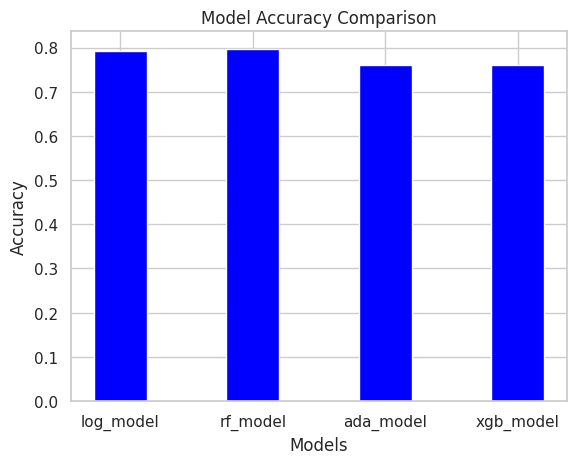

In [ ]:
plt.bar(models['Model'], models['Score'],width = 0.4, color = 'blue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()